In [1]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
# 오류메세지 숨기기기
import warnings
warnings.filterwarnings(action='ignore')

# 18.1

## a

In [10]:
sept11 = pd.read_csv("Sept11Travel.csv")
sept11.tail()

,Month-Year,AirRPM,RailPM,VMT_billions
167,3-Dec,57795908,489403554,237.6
168,4-Jan,53447972,410338691,217.3
169,4-Feb,52608801,389778365,210.4
170,4-Mar,63600019,453014590,247.5
171,4-Apr,61887720,471116666,245.4


In [11]:
form19 = "%b-%y"
form20 = "%y-%b"
sept11['Date'] = pd.to_datetime(sept11['Month-Year'].iloc[0:132], format = form19)
sept11['Month-Year'].iloc[132:172] = '0' + sept11['Month-Year'].iloc[132:172]
sept11['Date'].iloc[132:172] = pd.to_datetime(sept11['Month-Year'].iloc[132:172], format = form20)
sept11.tail()

,Month-Year,AirRPM,RailPM,VMT_billions,Date
167,03-Dec,57795908,489403554,237.6,2003-12-01
168,04-Jan,53447972,410338691,217.3,2004-01-01
169,04-Feb,52608801,389778365,210.4,2004-02-01
170,04-Mar,63600019,453014590,247.5,2004-03-01
171,04-Apr,61887720,471116666,245.4,2004-04-01


In [5]:
before = sept11.iloc[0:140]
after = sept11.iloc[140:172]

Text(0.5, 0, 'Car')

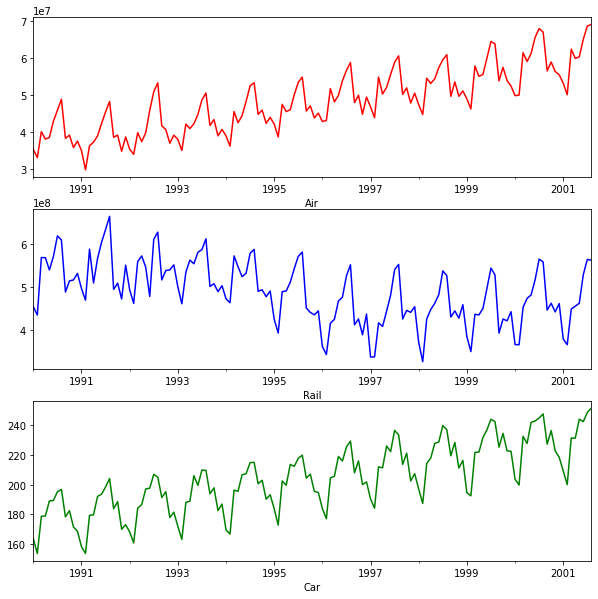

In [6]:
air = pd.Series(before.AirRPM.values, index=before.Date, name = 'Air')
rail = pd.Series(before.RailPM.values, index=before.Date, name = 'Rail')
car = pd.Series(before.VMT_billions.values, index=before.Date, name = 'Car')

air.index = pd.DatetimeIndex(air.index, freq = air.index.inferred_freq)
rail.index = pd.DatetimeIndex(rail.index, freq = rail.index.inferred_freq)
car.index = pd.DatetimeIndex(car.index, freq = car.index.inferred_freq)

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
ax = air.plot(color='red')
ax.set_xlabel('Air')
plt.subplot(3,1,2)
ax = rail.plot(color='blue')
ax.set_xlabel('Rail')
plt.subplot(3,1,3)
ax = car.plot(color='green')
ax.set_xlabel('Car')

## b
이이중중지지수수평평활활법법이이다다. 계절변동은 제거되되었었지지만  추추세세는  남남아아있있으으므므로로.

# 18.2

omega = 2/alpha-1 인 경우에 이동평균법과 지수평활법은 유사한 결과를 낸다. (alpha = 평활상수, omega = 윈도우의 폭)  
따라서, alpha = 2/(omega+1) 이다. 문제에서 윈도우의 폭 omega가 굉장히 작은 값을 가진다고 하였으므로 0에 가까운 값을 가진다.  
이때, omega가 무한히 0으로 가까워질 때 alpha = 2/(omega+1)는 2에 가까워지므로 2가 평활상수(alpha)로 적절하다.  

# 18.3

## a
예측이므로 이전이동평균법을 이용한다. 이전 모든 시점의 데이터값에 대한 평균이므로,  

In [7]:
print('Jan 99 : ',(27+31+58+63)/4)

Jan 99 :  44.75


## b

In [8]:
print('residual : ',44.75-59)

residual :  -14.25


# 18.4

## a
추세가 통계적으로 유의하지 않다.

## b
과적합이 발생할 수 있다.

# 18.5

In [14]:
df = pd.read_csv("DepartmentStoreSales.csv")
df.tail()

,Quarter,Sales
19,20,92183
20,21,60800
21,22,64900
22,23,76997
23,24,103337


## a
원 시계열에 이동평균법 적용 - 해당 데이터는 추세와 계절변동이 존재하므로 이동평균법은 적절하지 않다.  
계절변동을 제거한 시계열에 이동평균법을 적용 - 해당 데이터는 추세도 존재하므로 추세에 대해 과소/과대 예측을 할 수있다.  
원 시계열에 단순지수평활법을 적용 - 해당 데이터는 추세와 계절변동이 존재하므로 단순지수평활법은 적절하지 않다.  
이중지수평활법을 원 시계열에 적용 - 해당 데이터는 계절변동도 존재하므로 계절변동에 대해 과소/과대 예측을 할 수있다.  

## b
### (i)
SmoothingModel.fit() 함수 파라미터 참고 : https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.fit.html

In [15]:
df['Date'] = pd.to_datetime(df.Quarter, format='%d')
df_ts = pd.Series(df.Sales.values, index = df.Date, name='Sales')
df_ts.index = pd.DatetimeIndex(df_ts.index, freq=df_ts.index.inferred_freq)

In [16]:
train_df = df_ts.iloc[0:20]
valid_df = df_ts.iloc[20:]

In [17]:
expSmooth = ExponentialSmoothing(train_df, trend='multiplicative', seasonal='multiplicative', seasonal_periods=4)
expSmoothFit = expSmooth.fit(smoothing_level=0.2, smoothing_trend=0.15, smoothing_seasonal=0.05)

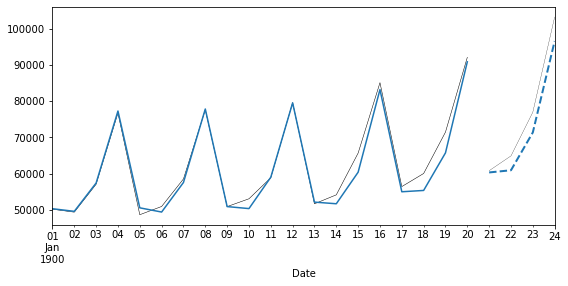

In [18]:
fig, ax = plt.subplots(figsize=(9,4))
train_df.plot(ax=ax, color='black', linewidth=0.5)
valid_df.plot(ax=ax, color='black', linewidth=0.25)

expSmoothFit.fittedvalues.plot(ax=ax)
expSmoothFit.forecast(len(valid_df)).plot(ax=ax, style='--', linewidth=2, color='C0')

plt.show()

<AxesSubplot:xlabel='Date'>

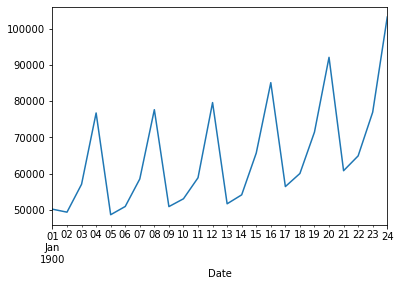

In [19]:
df_ts.plot()

### (ii)

In [56]:
## 회귀분석 예측

# 계절변동이 4분기 단위임 이를 회귀모델에 적용시키기 위해 Qaurter의 형태를 변경하겠음
raw = pd.read_csv("DepartmentStoreSales.csv")
raw.Quarter = raw.Quarter.astype("object")
for j in range(0,22,4):
    raw.Quarter[j] =  "03"
    raw.Quarter[j+1] = '06'
    raw.Quarter[j+2] = '09'
    raw.Quarter[j+3] = '12'
raw

/var/folders/z6/j3q11gsn0ls8wtjzqj36nssm0000gp/T/ipykernel_925/1287648096.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw.Quarter[j] =  "03"
/var/folders/z6/j3q11gsn0ls8wtjzqj36nssm0000gp/T/ipykernel_925/1287648096.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw.Quarter[j+1] = '06'
/var/folders/z6/j3q11gsn0ls8wtjzqj36nssm0000gp/T/ipykernel_925/1287648096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw.Quarter[j+

,Quarter,Sales
0,03,50147
1,06,49325
2,09,57048
3,12,76781
4,03,48617
5,06,50898
6,09,58517
7,12,77691
8,03,50862
9,06,53028


In [57]:
raw['Date'] = pd.to_datetime(raw.Quarter, format='%m')
raw_ts = pd.Series(raw.Sales.values, index = raw.Date, name='Sales')
raw_ts.index = pd.DatetimeIndex(raw_ts.index, freq=raw_ts.index.inferred_freq)

In [60]:
raw_df = tsatools.add_trend(raw_ts, trend = 'ct')
raw_df['Month'] = raw_df.index.month

In [63]:
train_df = raw_df[:20]
valid_df = raw_df[20:]

In [64]:
formula = 'Sales ~ trend + np.square(trend) + C(Month)' 
sales_lm_trendseason = sm.ols(formula=formula, data=train_df).fit()

In [76]:
# 회귀분석모델의 21,22분기 예측값
sales_lm_trendseason.predict(valid_df.iloc[0:2, :])

Date
1900-03-01    64947.249270
1900-06-01    68417.106934
dtype: float64

In [72]:
# MAPE 도출 함수 정의
def MAPE(y,t):
    return ((abs((y-t)/y))*100).mean(axis=None)

In [13]:
(100/2)*abs((60800-59384.56586)/60800 + (64900-61656.49426)/64900)

3.6628571369667893

In [77]:
# 회귀분석모델의 MAPE
MAPE(raw.Sales[[20,21]].values, sales_lm_trendseason.predict(valid_df.iloc[0:2, :]).values)

6.12020237654841

In [ ]:
## 홀트-윈터 지수평활법

In [89]:
# 홀트-윈터 지수평활법 21,22분기 예측값
expSmoothFit.forecast(len(valid_df)-2)

1900-01-21    60320.920163
1900-01-22    60921.496331
Freq: D, dtype: float64

In [91]:
# 지수평활법의 MAPE
MAPE(raw.Sales[[20,21]].values,expSmoothFit.forecast(len(valid_df)-2).values)

3.4590831101064996

## c

오차가 비교적 적은 편으로 보이므로, 지수평활법을 이용하는 것이 적절하다.

# 18.6

In [92]:
df = pd.read_csv("./ApplianceShipments.csv")
df.tail()

,Quarter,Shipments
15,Q4-1988,4258
16,Q1-1989,4245
17,Q2-1989,4900
18,Q3-1989,4585
19,Q4-1989,4533


## a
추세는 있지만 계절변동은 없으므로, 이중지수평활법이 적합하다고 생각한다.

## b

In [98]:
for j in range(0,17,4):
    df.Quarter[j] =   df.Quarter[j].replace('Q1','03')
    df.Quarter[j+1] = df.Quarter[j+1].replace('Q2','06')
    df.Quarter[j+2] = df.Quarter[j+2].replace('Q3','09')
    df.Quarter[j+3] = df.Quarter[j+3].replace('Q4','12')

/var/folders/z6/j3q11gsn0ls8wtjzqj36nssm0000gp/T/ipykernel_925/3346746173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quarter[j] =   df.Quarter[j].replace('Q1','03')
/var/folders/z6/j3q11gsn0ls8wtjzqj36nssm0000gp/T/ipykernel_925/3346746173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quarter[j+1] = df.Quarter[j+1].replace('Q2','06')
/var/folders/z6/j3q11gsn0ls8wtjzqj36nssm0000gp/T/ipykernel_925/3346746173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [101]:
df['Date'] = pd.to_datetime(df.Quarter, format='%m-%Y')
df_ts = pd.Series(df.Shipments.values, index = df.Date, name='Shipments')
df_ts.index = pd.DatetimeIndex(df_ts.index, freq=df_ts.index.inferred_freq)

In [102]:
train_ts = df_ts[:19]
valid_ts = df_ts[19:]

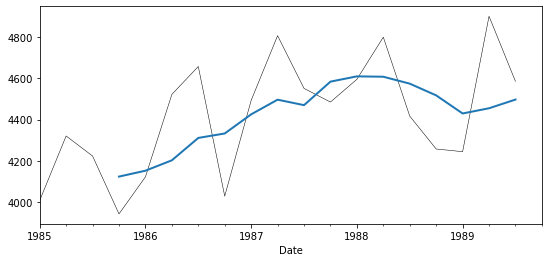

In [114]:
ma_trailing = train_ts.rolling(4).mean()
last_ma = ma_trailing[-1]
ma_trailing_pred = pd.Series(last_ma, index=valid_ts.index)
fig, ax = plt.subplots(figsize = (9,4))
train_ts.plot(ax=ax, color='black', linewidth=0.5)
valid_ts.plot(ax=ax, color='black', linewidth=0.25)
ma_trailing.plot(ax=ax, linewidth=2, color='C0')
ma_trailing_pred.plot(ax=ax, style='--', linewidth=2, color='C0')

plt.show()

### (i)
추세를 나타내고 있다.

### (ii)

In [112]:
ma_trailing_pred

Date
1989-12-01    4497.0
Freq: QS-DEC, dtype: float64

### (iii)
또한 4497.0

### (iv)
실제값이 없는데..? 아무튼 과소추정/과대추정 중에 하나다. 왜냐하면 이동평균은 단순평균값을 이용하기 때문에 증가 및 감소추세와, 계절변동을 반영하지 못하기 때문이다.

### (V)
증가/감소 추세와 계절변동을 반영하지 못해, 과소/과대추정을 할 수 있다는 점 

## c

In [120]:
train_ts = df_ts[:16]
valid_ts = df_ts[16:]

### (i) 회귀모델

In [125]:
df_ = tsatools.add_trend(df_ts, trend = 'ct')
df_['Month'] = df_ts.index.month
train_ts = df_[:16]
valid_ts = df_[16:]

/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [132]:
formula = 'Shipments ~ trend + np.square(trend) + C(Month)' 
shipments_lm_trendseason = sm.ols(formula=formula, data=train_ts).fit()
MAPE(df.Shipments.iloc[-4:].values, shipments_lm_trendseason.predict(valid_ts).values)

5.790944201575712

### (ii) 홀트-윈터 지수평활법 

In [135]:
expSmooth = ExponentialSmoothing(train_df, trend='multiplicative', seasonal='multiplicative', seasonal_periods=4)
expSmoothFit = expSmooth.fit()
MAPE(df.Shipments.iloc[-4:].values,expSmoothFit.forecast(len(valid_df)).values)

/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1566.0192512544431

### (iii)
회귀모델이 적합하다.
1. MAPE값이 현저히 작다
2. ...
3. ...

### (iv)
평활상수가 0에 가까울수록 과거에 값을 더 큰 비중을 주는 것이다. 0에 가까울 것이다.   
데이터의 계절변동이 뚜렷해서 최근 데이터를 바로 이용해도 되는 게 아니라서, 조금 더 과거 데이터들에 가중치를 줘서    
더 균등한 결과를 내야 할 것 같다.  

# 18.7

## a
홀트-윈터 지수평활법

# 18.8

In [36]:
## a
df = pd.read_csv("./NaturalGasSales.csv")
df

,Quarter,Gas Sales
0,Winter-2001,170
1,Spring-2001,148
2,Summer-2001,141
3,Fall-2001,150
4,Winter-2002,161
5,Spring-2002,137
6,Summer-2002,132
7,Fall-2002,158
8,Winter-2003,157
9,Spring-2003,145


In [37]:
# spring - 3월, summer - 6월, fall - 9월 , winter - 12월
for j in range(0,13,4):
    df.Quarter[j] = df.Quarter[j].replace('Winter','12')
    df.Quarter[j+1] = df.Quarter[j+1].replace('Spring','03')
    df.Quarter[j+2] = df.Quarter[j+2].replace('Summer','06')
    df.Quarter[j+3] = df.Quarter[j+3].replace('Fall','09')

In [39]:
df = df.rename(columns={'Gas Sales':'Sales'})
df

,Quarter,Sales
0,12-2001,170
1,03-2001,148
2,06-2001,141
3,09-2001,150
4,12-2002,161
5,03-2002,137
6,06-2002,132
7,09-2002,158
8,12-2003,157
9,03-2003,145


In [41]:
df['Date'] = pd.to_datetime(df.Quarter, format='%m-%Y')
df_ts = pd.Series(df.Sales.values, index=df.Date, name='Sales')
df_ts.index = pd.DatetimeIndex(df_ts.index, freq=df_ts.index.inferred_freq)

In [52]:
ma_trailing = df_ts.rolling(4).mean()

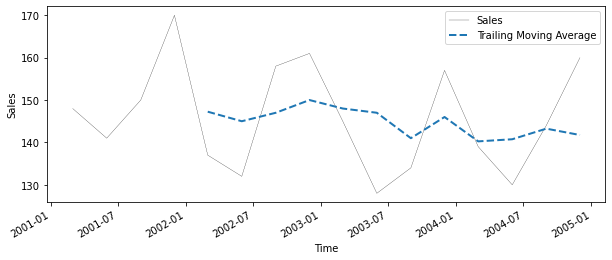

In [53]:
fig, ax = plt.subplots(figsize=(10,4))
ax = df_ts.plot(ax=ax, color='black', linewidth=0.25)
ma_trailing.plot(ax=ax, linestyle='--', linewidth=2)
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend(['Sales','Trailing Moving Average'])

plt.show()

## b
시계열 데이터의 추세를 확인할 수 있다.

## c

In [63]:
ma_trailing[-1]

143.25

과소추정될 것이다. 시계열의 계절변동을 보면 겨울 때 값이 증가하는 패턴을 보이는데,   
이동평균법을 사용하여 예측하면 학습데이터의 마지막 값(가을)을 그대로 사용하기 때문에 겨울에 값이 증가하는 것을 반영하지 못한다. 

# 18.9

In [67]:
df = pd.read_csv("AustralianWines.csv")
df.tail()

,Month,Drywhite,Fortified,Red,Rose,Sparkling,Sweetwhite
182,1995-03,4067,1818,2459,45.0,1897,188
183,1995-04,4022,2262,2618,52.0,1862,195
184,1995-05,3937,2612,2585,28.0,1670,189
185,1995-06,4365,2967,3310,40.0,1688,220
186,1995-07,4290,3179,3923,62.0,2031,274


## a
홀트-윈터 지수 평활법. Sweet Wine Sales 같은 경우, 데이터 값의 갑작스러운 변동을 보인다.  
모델을 회귀분석으로는 이러한 갑작스러운 변동을 적절히 반영하지 못하므로, 데이터로부터 값을 예측하는 평활법이 적절하며,  
대부분의 품목의 시계열에서 뚜렷한 계절변동과 추세를 보이므로 홀트-윈터 지수 평활법이 적절하다.  

## b (fortified / forecasting after 2 months )


In [68]:
df = df[['Month','Fortified']]
df

,Month,Fortified
0,1980-01,2585
1,1980-02,3368
2,1980-03,3210
3,1980-04,3111
4,1980-05,3756
...,...,...
182,1995-03,1818
183,1995-04,2262
184,1995-05,2612
185,1995-06,2967


In [71]:
df['Date'] = pd.to_datetime(df.Month, format='%Y-%m')
df_ts = pd.Series(df.Fortified.values, index=df.Date, name='Fortified')
df_ts.index = pd.DatetimeIndex(df_ts.index, freq=df_ts.index.inferred_freq)

In [72]:
train_ts = df_ts.iloc[:168]
valid_ts = df_ts.iloc[168:]

<AxesSubplot:xlabel='Date'>

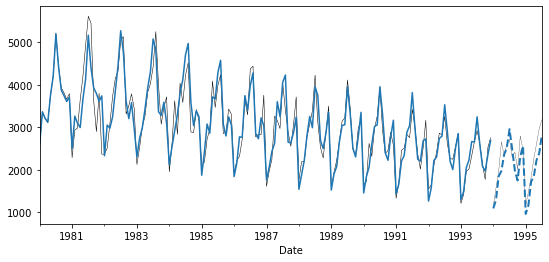

In [74]:
expSmooth = ExponentialSmoothing(train_ts, trend='additive', seasonal='additive', seasonal_periods=12, freq='MS')
expSmoothFit = expSmooth.fit()
fig, ax = plt.subplots(figsize=(9,4))
train_ts.plot(ax=ax, color='black', linewidth=0.5)
valid_ts.plot(ax=ax, color='black', linewidth=0.25)

expSmoothFit.fittedvalues.plot(ax=ax)
expSmoothFit.forecast(len(valid_ts)).plot(ax=ax, style='--', linewidth=2, color='C0')


12개월이 적당하다.

In [78]:
residuals = train_ts.values - expSmoothFit.fittedvalues.values

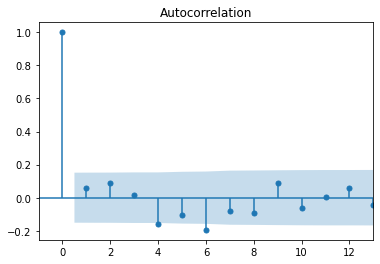

In [82]:
from statsmodels.tsa import tsatools, stattools
from statsmodels.graphics import tsaplots

tsaplots.plot_acf(residuals) # tsaplots.plot_acf() : ㅈㅏ기상관함수 plotting
plt.xlim(-1, 13)
plt.show()

### (i)
잘 모르겟...
lag가 뭐엿지...
같은 달의 판매량 사이에는 강한 상관관계가 있다. (?)

### (ii)
상기 효과가 뭘 말하는 건지 모르겠는딩????